In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 8]
import os
from skimage import feature
from skimage import exposure

from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle

# 0. Przykłady działania HOG

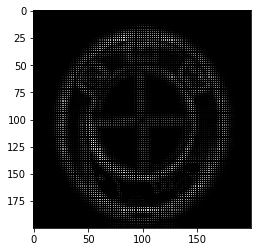

In [2]:
#dokumentacja
#https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.hog


def hog_descriptor(image, orientations, pixels_per_cell, cells_per_block):
    return feature.hog(image, orientations, pixels_per_cell, cells_per_block, transform_sqrt=True, block_norm="L1", visualize=True)
#visualise zwraca również zdjęcie obrazka, block_norm sposób regularyzacji, transform_sqrt - normalizację
orientations=9 #ile orientacji gradientów ma badać (360 stopni na 9)
pixels_per_cell=(2, 2) #piksele na komórkę badaną
cells_per_block=(3, 3) #komórki w bloku (jednym przejściu)

image = cv2.imread('agh_cv/car_brand/images/bmw/1.png')

(H, hogImage) = hog_descriptor(image, orientations, pixels_per_cell, cells_per_block)
#H to wektor opisu zdjęcia
hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
hogImage = hogImage.astype("uint8")
plt.imshow(hogImage, cmap='gray')

777924


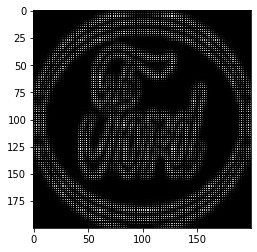

In [3]:
image = cv2.imread('agh_cv/car_brand/images/ford/1.png')

(H, hogImage) = hog_descriptor(image, orientations, pixels_per_cell, cells_per_block)


hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
hogImage = hogImage.astype("uint8")
print(len(H))
plt.imshow(hogImage, cmap='gray')

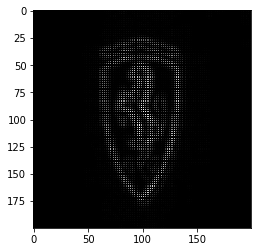

In [4]:
image = cv2.imread('agh_cv/car_brand/images/ferrari/1.jpg')

(H, hogImage) = hog_descriptor(image, orientations, pixels_per_cell, cells_per_block)


hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
hogImage = hogImage.astype("uint8")
plt.imshow(hogImage, cmap='gray')

# 1. Wczytaj zbiór danych

In [6]:
mapping = {}
images = []
labels = []

for i, brand in enumerate(os.listdir('agh_cv/car_brand/images')):
    if not brand.startswith('.'):
        mapping[i] = brand
        brand_directory = os.path.join('agh_cv/car_brand/images', brand)
        for filename in os.listdir(brand_directory):
            image = cv2.imread(os.path.join(brand_directory, filename))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            images.append(image)
            labels.append(i)

print(labels)
print(mapping)

[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4]
{0: 'ferrari', 1: 'ford', 3: 'bmw', 4: 'honda'}


# 2. Wykonaj ekstrakcję cech za pomocą HOG

In [7]:
orientations=9
pixels_per_cell=(3, 3)
cells_per_block=(3, 3)
#wymieszaj zdjęcia
images, labels = shuffle(images, labels)
#wyucz cechy
features = [hog_descriptor(image, orientations, pixels_per_cell, cells_per_block)[0] for image in images]

In [8]:
len(features[1])

331776

# 3. Trenuj klasyfikator KNN

In [9]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(features, labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

# 4. Testowanie skuteczności

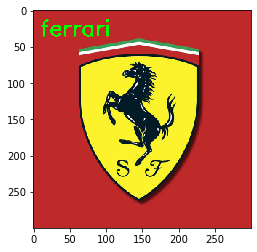

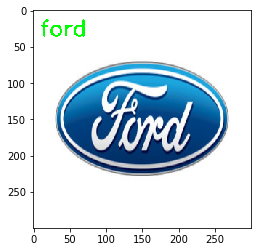

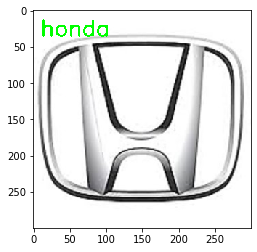

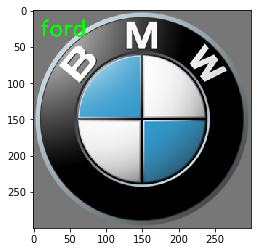

In [11]:
for filename in os.listdir('agh_cv/car_brand/test_images'):
    image = cv2.imread(os.path.join('agh_cv/car_brand/test_images', filename))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (300, 300))
    rescaled_image = cv2.resize(image, (200, 200))
    
    gray_image = cv2.cvtColor(rescaled_image, cv2.COLOR_BGR2GRAY)
    H = hog_descriptor(gray_image, orientations, pixels_per_cell, cells_per_block)[0]
    result = model.predict(H.reshape(1, -1))[0]
    
    cv2.putText(image, mapping[result], (10, 35), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2)
    plt.imshow(image)
    plt.show()